In [1]:
#pip install pyometiff

In [3]:
#Importation des librairies

import pathlib
from pyometiff import OMETIFFReader
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping



In [3]:
#Se connecter à google drive
#from google.colab import drive
#drive.mount('/content/drive')

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range


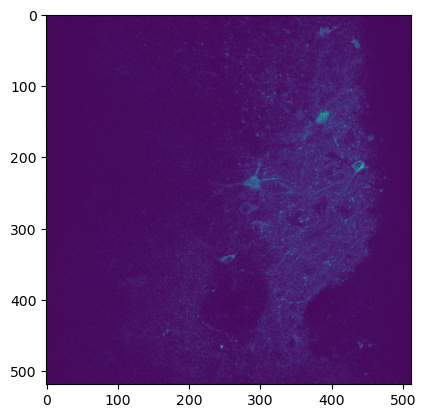

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range


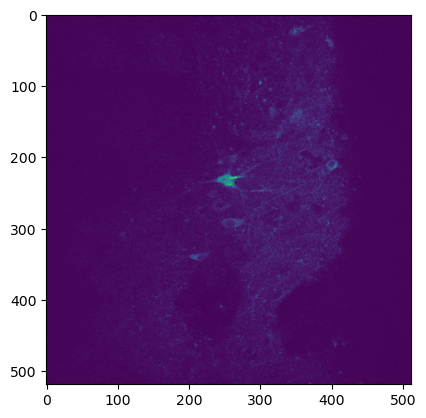

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range


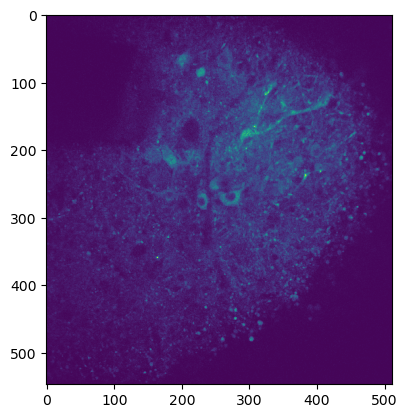

(2, 1831, 519, 512)
(2, 916, 519, 512)
(2, 1737, 547, 512)


In [4]:
img_paths_4 = [
    
    #pathlib.Path('Data/230425_S3bis_002.ome.ome.tiff'),
    pathlib.Path('Data/220601-S1bis_03_500mv_bis.ome.ome.tiff'),
    pathlib.Path('Data/220601-S1bis_07.ome.ome.tiff'),
    
    pathlib.Path('Data/220728-S2_04_500mV_bis.ome.tiff')
]

img_paths_3 = [

    #pathlib.Path('Data/230922_S1_005.ome.tiff')
    
]

# Liste pour stocker toutes les images
img_arrays = []
img_arrays_2 = []

for path in img_paths_4:
    reader = OMETIFFReader(fpath=path)
    img_array, metadata, xml_metadata = reader.read()
    
    img_arrays.append(img_array)  # Ajouter le tableau à la liste
    
    # Afficher une image pour vérifier

    (color, number_img, x, y) = img_array.shape
    img1 = img_array[1, 4, :, :]
    plt.imshow(img1)
    plt.show()
    
for path in img_paths_3:
    reader = OMETIFFReader(fpath=path)
    img_array, metadata, xml_metadata = reader.read()
    
    img_arrays_2.append(img_array)  # Ajouter le tableau à la liste
    
    # Afficher une image pour vérifier

    (number_img, x, y) = img_array.shape
    img1 = img_array[4, :, :]
    plt.imshow(img1)
    plt.show()
    #print(img_array.shape)

# Vérification : longueur de la liste
print(img_arrays[0].shape)
print(img_arrays[1].shape)
print(img_arrays[2].shape)
#print(img_arrays_2[0].shape)


In [5]:
# Prétraitement des images
image_size = (360, 360)
images = []
labels = []

def load_images_from_directory(image_array):

    _, number_img, _, _ = image_array.shape
    number_img = number_img 
    for k in range(number_img):
        image = cv2.resize(image_array[1, k, :, :], image_size)
        image = image.astype(np.float32) / 255.0  # Normalisation entre 0 et 1
        
        images.append(np.expand_dims(image, axis=-1))

        # Amélioration des contrastes 

        alpha = 30 #amélioration du contraste
        beta = 0.1 #éclaircir >0
        gamma = 1 # augmente l'intensité >1
        
        #adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

        # Correction gamma pour un ajustement non linéaire
        #gamma_corrected = np.power(adjusted / 255.0, gamma) * 255.0
        #gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)
        
        # Filtrage Gaussian Floue
        gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Filtrage Bilateral
        bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
        
        seuil_filtre_max = bilateral_filter.max() 

        seuil_filtre_mean = (bilateral_filter.mean() / seuil_filtre_max ) * 255.0
        
        seuil_ecart_type = (bilateral_filter.std() / seuil_filtre_max ) * 255.0
        # Création du masque
        bilateral_filter = (bilateral_filter / bilateral_filter.max()) * 255.0
        
        #print(bilateral_filter.max())
        #_, mask = cv2.threshold(bilateral_filter, 600 , 255, cv2.THRESH_BINARY)
        
        _, mask = cv2.threshold(bilateral_filter, seuil_filtre_mean + 3*seuil_ecart_type , 255.0, cv2.THRESH_BINARY)
        mask = cv2.resize(mask, image_size)
        mask = mask / 255.0
        labels.append(np.expand_dims(mask, axis=-1))


def load_images_from_directory_bis(image_array):

    number_img, _, _ = image_array.shape
    number_img = number_img // 4
    for k in range(number_img):
        image = cv2.resize(image_array[k, :, :], image_size)
        image = image.astype(np.float32) / 255.0  # Normalisation entre 0 et 1
        
        images.append(np.expand_dims(image, axis=-1))

        # Amélioration des contrastes 

        alpha = 30 #amélioration du contraste
        beta = 0.1 #éclaircir >0
        gamma = 1 # augmente l'intensité >1
        
        #adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

        # Correction gamma pour un ajustement non linéaire
        #gamma_corrected = np.power(adjusted / 255.0, gamma) * 255.0
        #gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)
        
        # Filtrage Gaussian Floue
        gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Filtrage Bilateral
        bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
        
        seuil_filtre_max = bilateral_filter.max() 

        seuil_filtre_mean = (bilateral_filter.mean() / seuil_filtre_max ) * 255.0
        
        seuil_ecart_type = (bilateral_filter.std() / seuil_filtre_max ) * 255.0
        # Création du masque
        bilateral_filter = (bilateral_filter / bilateral_filter.max()) * 255.0
        
        #print(bilateral_filter.max())
        #_, mask = cv2.threshold(bilateral_filter, 600 , 255, cv2.THRESH_BINARY)
        
        _, mask = cv2.threshold(bilateral_filter, seuil_filtre_mean + 3*seuil_ecart_type , 255.0, cv2.THRESH_BINARY)
        mask = cv2.resize(mask, image_size)
        mask = mask / 255.0
        labels.append(np.expand_dims(mask, axis=-1))



load_images_from_directory(img_arrays[0])
load_images_from_directory(img_arrays[1])
load_images_from_directory(img_arrays[2])
#load_images_from_directory_bis(img_arrays_2[0])



images = np.array(images)
labels = np.array(labels)

#print(images[0])
#print(labels[0])


# Mélanger et diviser les données
images, labels = shuffle(images, labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


print(f'Taille de X_train: {X_train.shape}')
print(f'Taille de y_train: {y_train.shape}')
print(f'Taille de X_val: {X_val.shape}')
print(f'Taille de y_val: {y_val.shape}')

Taille de X_train: (3587, 360, 360, 1)
Taille de y_train: (3587, 360, 360, 1)
Taille de X_val: (897, 360, 360, 1)
Taille de y_val: (897, 360, 360, 1)


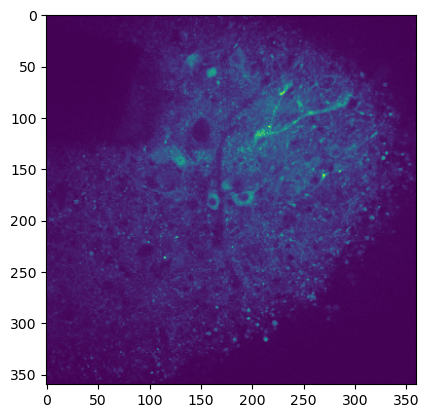

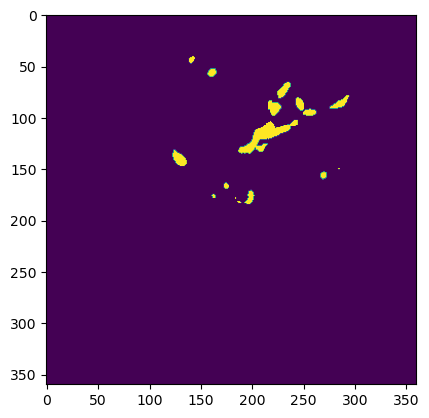

In [6]:
#Affichage d'exemple

plt.imshow(X_train[366].squeeze())
plt.show()
plt.imshow(y_train[366].squeeze())
plt.show()

In [7]:
#Augmentation des données

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    #brightness_range=[0.8, 1.2],  
    #preprocessing_function=adjust_contrast
)


augmented_images = []
augmented_labels = []

for i in range(len(X_train)):
    image = X_train[i]
    label = y_train[i]

    image = np.expand_dims(image, axis=0)  # Ajouter une dimension batch

    # Générer plusieurs augmentations pour chaque image
    aug_iter = datagen.flow(image, batch_size=1)
    
    for _ in range(1):  # Générer 1 versions augmentées par image
        aug_img = next(aug_iter)[0]
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# Convertir en tableaux numpy et concaténer avec X_train
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)



X_train = np.concatenate((X_train, augmented_images))
y_train = np.concatenate((y_train, augmented_labels))

# Mélanger les données après augmentation
X_train, y_train = shuffle(X_train, y_train, random_state=42)



print(f'Nouvelle taille de X_train: {X_train.shape}')
print(f'Nouvelle taille de y_train: {y_train.shape}')

#Affichage des décalages



Nouvelle taille de X_train: (7174, 360, 360, 1)
Nouvelle taille de y_train: (7174, 360, 360, 1)


In [4]:
#Importation des librairies pour le U-Net

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input, Dropout
from tensorflow.keras import layers, Model

In [9]:
def build_simple_unet(input_size=(360, 360, 1)):
    inputs = Input(shape=input_size)

    # Encoder
    c0 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p0 = MaxPooling2D((2, 2), padding='same')(c0)

    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(p0)
    p1 = MaxPooling2D((2, 2), padding='same')(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2), padding='same')(c2)

    # Bottleneck
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u3 = concatenate([u3, c2])  
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u3)

    u4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u4 = concatenate([u4, c1])  
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)

    u5 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)
    u5 = concatenate([u5, c0])  
    c6 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c6)
    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [10]:
#Construction du modèle
model = build_simple_unet(input_size=(360, 360, 1))

#Descrition du modèle
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 360, 360, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 360, 360, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 180, 180, 32)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 180, 180, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 90, 90, 64)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 90, 90, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 45, 45, 128)       │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 45, 45, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 90, 90, 128)       │         131,200 │ conv2d_3[0][0]             │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 90, 90, 256)       │               0 │ conv2d_transpose[0][0],    │
│                               │                           │                 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 90, 90, 128)       │         295,040 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose_1            │ (None, 180, 180, 64)      │          32,832 │ conv2d_4[0][0]             │
│ (Conv2DTranspose)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 180, 180, 128)     │               0 │ conv2d_transpose_1[0][0],  │
│                               │                           │                 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 180, 180, 64)      │          73,792 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 947,425 (3.61 MB)

 Trainable params: 947,425 (3.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=3
)


Epoch 1/3


C:\Users\grego\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


225/225 ━━━━━━━━━━━━━━━━━━━━ 3354s 15s/step - accuracy: 0.9905 - loss: 0.1164 - val_accuracy: 0.9954 - val_loss: 0.0130
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 1880s 8s/step - accuracy: 0.9931 - loss: 0.0318 - val_accuracy: 0.9982 - val_loss: 0.0059
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 1893s 8s/step - accuracy: 0.9940 - loss: 0.0288 - val_accuracy: 0.9987 - val_loss: 0.0031


In [12]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)


29/29 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9988 - loss: 0.0031


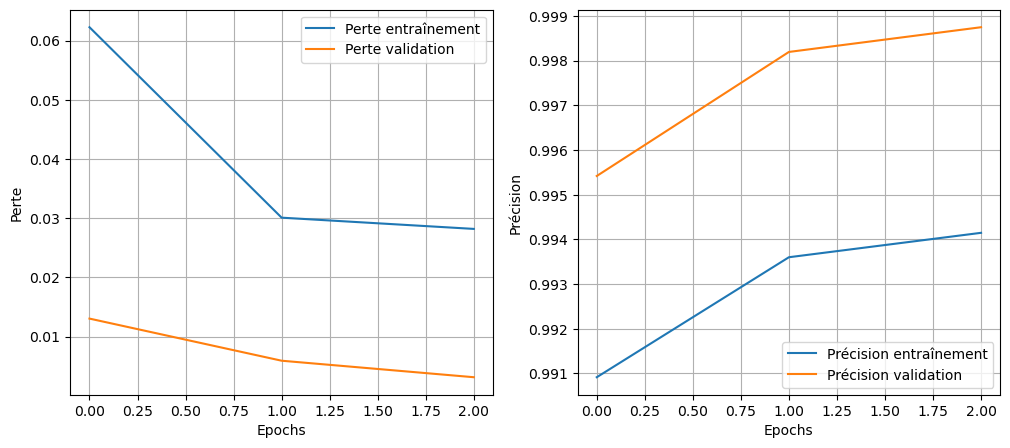

In [13]:
def plot_training_history(history):
    """Affiche l'évolution des métriques pendant l'entraînement."""
    plt.figure(figsize=(12, 5))

    # Courbes de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte entraînement')
    plt.plot(history.history['val_loss'], label='Perte validation')
    plt.xlabel('Epochs')
    plt.ylabel('Perte')
    plt.legend()
    plt.grid()

    # Courbes de précision (ou IoU si configuré)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Précision entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision validation')
    plt.xlabel('Epochs')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid()

    plt.show()

#Résultats

plot_training_history(history)

In [14]:
#model.save("model_unet.keras")


In [7]:
from tensorflow.keras.models import load_model
model = load_model("model_unet.keras")

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range


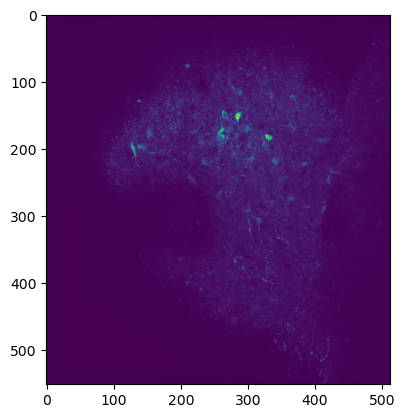

(401, 551, 512)


In [9]:
img_paths_test = [
    
    #pathlib.Path('Data/230425_S3bis_002.ome.ome.tiff'),
    #pathlib.Path('Data/220601-S1bis_03_500mv_bis.ome.ome.tiff')
    #pathlib.Path('Data/220601-S1bis_07.ome.ome.tiff')
    #pathlib.Path('Data/230920_S3_007.ome.ome.ome.tiff')
    #pathlib.Path('Data/220728-S2_04_500mV_bis.ome.tiff')
    pathlib.Path('Data/230922_S1_011.ome.tiff')
]

# Liste pour stocker toutes les images
img_arrays_test = []

for path in img_paths_test:
    reader = OMETIFFReader(fpath=path)
    img_array, metadata, xml_metadata = reader.read()
    
    img_arrays_test.append(img_array)  # Ajouter le tableau à la liste
    
    # Afficher une image pour vérifier
    
    ( number_img, x, y) = img_array.shape
    img1 = img_array[4, :, :]
    plt.imshow(img1)
    plt.show()
    #print(img_array.shape)

# Vérification : longueur de la liste
print(img_arrays_test[0].shape)
#print(img_arrays[1].shape)
#print(img_arrays[2].shape)


In [10]:
# Prétraitement des images
image_size = (360, 360)
images = []
labels = []

def load_images_from_directory(image_array):

    #_, number_img, _, _ = image_array.shape
    number_img, _, _ = image_array.shape
    number_img = number_img  
    for k in range(number_img):
        image = cv2.resize(image_array[k, :, :], image_size)
        image = image.astype(np.float32) / 255.0  # Normalisation entre 0 et 1
        images.append(np.expand_dims(image, axis=-1))
        
     
        #print(bilateral_filter.max())
        #_, mask = cv2.threshold(bilateral_filter, 600 , 255, cv2.THRESH_BINARY)
        _, mask = cv2.threshold(image, 0.7*255 , 255.0, cv2.THRESH_BINARY)
        mask = cv2.resize(mask, image_size)
        mask = mask / 255.0
        labels.append(np.expand_dims(mask, axis=-1))



load_images_from_directory(img_arrays_test[0])
#load_images_from_directory(img_arrays[1])
#load_images_from_directory(img_arrays[2])

images = np.array(images)
labels = np.array(labels)

#print(images[0])
#print(labels[0])


# Mélanger et diviser les données
images, labels = shuffle(images, labels, random_state=42)

X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(images, labels, test_size=0.5, random_state=42)


print(f'Taille de X_train: {X_test_1.shape}')
print(f'Taille de y_train: {y_test_1.shape}')
print(f'Taille de X_val: {X_test_2.shape}')
print(f'Taille de y_val: {y_test_2.shape}')

Taille de X_train: (200, 360, 360, 1)
Taille de y_train: (200, 360, 360, 1)
Taille de X_val: (201, 360, 360, 1)
Taille de y_val: (201, 360, 360, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
(360, 360, 1)


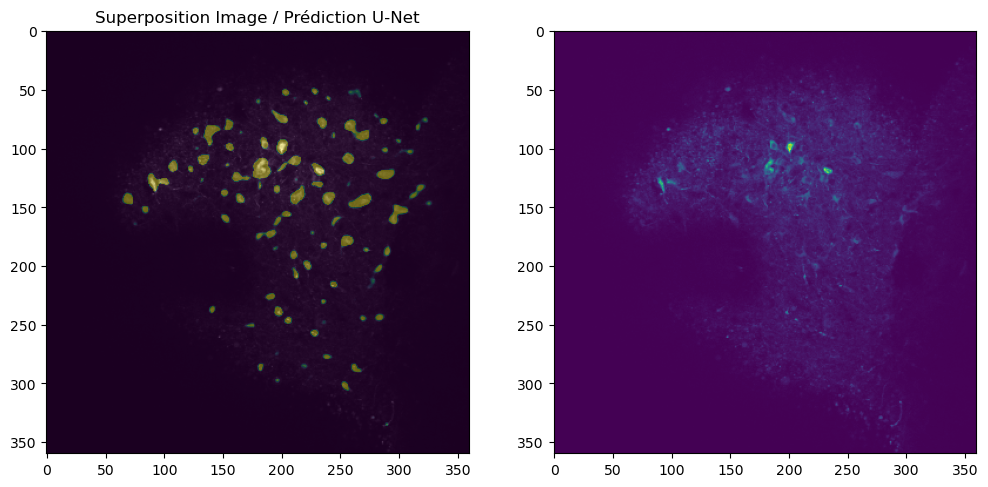

In [11]:
# Faire une prédiction sur un exemple du dataset de test
preds = model.predict(X_test_2)

image_test = X_test_2[10]

prediction_unet = preds[10]

print(np.shape(preds[10]))
# Afficher l'image d'entrée avec la prédiction superposée
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Superposition Image / Prédiction U-Net')
plt.imshow(image_test.squeeze(), cmap='gray')  # Affiche l'image d'entrée en niveaux de gris
plt.imshow(prediction_unet.squeeze(), alpha=0.4)  # Superpose la prédiction avec transparence
plt.subplot(1, 2, 2)
plt.imshow(image_test.squeeze())
#plt.axis('off')
plt.show()


In [13]:
# Enregistrer l'image de sortie
cv2.imwrite("masque.png", X_test_2[10].squeeze())

print("Image de la prédiction colorée enregistrée sous : PR/masque.png")

Image de la prédiction colorée enregistrée sous : PR/masque.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Contour 0: 13 points
[[252 299]
 [252 300]
 [251 301]
 [252 302]
 [252 303]
 [254 305]
 [255 305]
 [256 306]
 [257 306]
 [257 304]
 [256 303]
 [256 301]
 [254 299]]
Contour 1: 11 points
[[260 284]
 [260 288]
 [262 290]
 [267 290]
 [268 289]
 [267 288]
 [265 288]
 [264 287]
 [264 286]
 [263 285]
 [263 284]]
Contour 2: 8 points
[[226 255]
 [225 256]
 [225 258]
 [227 260]
 [229 260]
 [231 258]
 [231 256]
 [230 255]]
Contour 3: 8 points
[[205 244]
 [203 246]
 [203 248]
 [204 249]
 [207 249]
 [208 248]
 [208 245]
 [207 244]]
Contour 4: 10 points
[[282 242]
 [280 244]
 [280 245]
 [281 246]
 [282 246]
 [283 247]
 [284 246]
 [285 246]
 [286 245]
 [286 242]]
Contour 5: 20 points
[[196 235]
 [195 236]
 [195 238]
 [194 239]
 [194 240]
 [195 241]
 [195 242]
 [196 242]
 [197 243]
 [198 243]
 [199 242]
 [200 242]
 [200 241]
 [201 240]
 [201 239]
 [200 238]
 [200 237]
 [199 236]
 [198 236]
 [197 235]]
Contour 6: 13 points
[[190 224]
 [189 225]
 [188 225]
 [187 226]
 [187 228]
 [188 228]
 [189 229]
 [

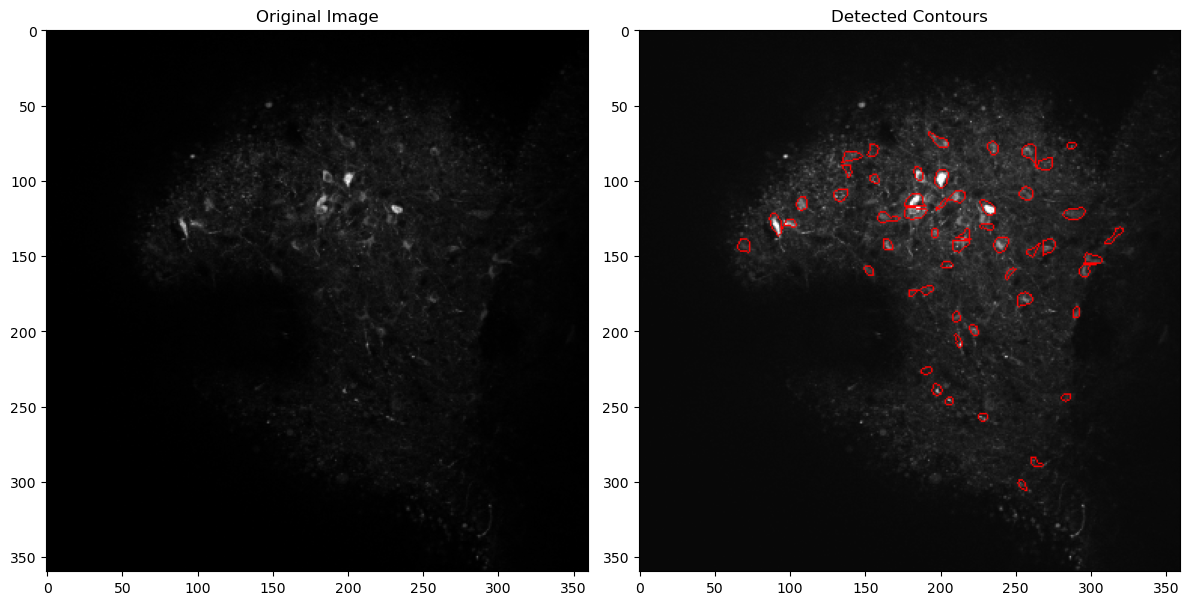

In [152]:
# Normaliser l'image pour la ramener sur 8 bits

coordonnees = []


gray = cv2.normalize(prediction_unet, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Binariser l'image pour isoler les points lumineux
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)


# Détection des contours des régions actives
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrer les petits contours selon leur aire
min_contour_area = 20  
max_contour_area = 100  # Seuil pour diviser les grands contours
filtered_contours = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    
    if area > max_contour_area:
        x, y, w, h = cv2.boundingRect(cnt)

        if w > h:
            # Division verticale (gauche / droite)
            cnt_left = cnt[cnt[:, :, 0] < x + w // 2]
            cnt_right = cnt[cnt[:, :, 0] >= x + w // 2]
        else:
            # Division horizontale (haut / bas)
            cnt_top = cnt[cnt[:, :, 1] < y + h // 2]
            cnt_bottom = cnt[cnt[:, :, 1] >= y + h // 2]

        # Ajouter les sous-contours à la liste
        if w > h:
            filtered_contours.append(cnt_left)
            filtered_contours.append(cnt_right)
        else:
            filtered_contours.append(cnt_top)
            filtered_contours.append(cnt_bottom)
    elif area > min_contour_area:
        filtered_contours.append(cnt)

#filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Convertir l'image en RGB pour dessiner dessus
original_rgb = cv2.cvtColor((X_test_2[10]*0.06).astype(np.float32), cv2.COLOR_GRAY2RGB)
# Dessiner les contours
contour_img = cv2.drawContours(original_rgb, filtered_contours, -1, (255, 0, 0), 1)


# Liste des coordonnées des contours
contour_coords = [cnt[:, 0, :] if cnt.ndim == 3 else cnt for cnt in filtered_contours]

numero_cercle = []
coordonnees_cercle = []

for i, coords in enumerate(contour_coords):

    numero_cercle.append(i)
    coordonnees_cercle.append(coords.tolist())
    
    
    coordonnees.append(f"Contour {i+1} :{coords}")
    
    print(f"Contour {i}: {coords.shape[0]} points")
    i=+1
    print(coords) 



# Affichage des résultats
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(X_test_2[10], cmap = 'gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(contour_img)  
plt.imshow(prediction_unet, alpha=0) 
plt.title('Detected Contours')

plt.tight_layout()
plt.show()


In [23]:


# Enregistrer l'image de sortie
cv2.imwrite("output_points.png", contour_img)

print("Image de la prédiction colorée enregistrée sous : PR/output_points.png")


Image de la prédiction colorée enregistrée sous : PR/output_points.png
